In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import km3pipe as kp
kp.style.use("jonas-phd")

Loading style definitions from '/home/jonas/.pyenv/versions/3.6.1/lib/python3.6/site-packages/km3pipe/kp-data/stylelib/jonas-phd.mplstyle'


In [3]:
%time data = pd.read_csv("/home/jonas/data/collider/collider_ps1.csv", delim_whitespace=True, comment="#")

<string>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 17.6 s, sys: 1.81 s, total: 19.5 s
Wall time: 19.8 s


In [6]:
data.points = np.array(data.points, dtype=np.float64)

In [7]:
def fix_values(data, parameter, fixed_values):
    for key, value in fixed_values.items():
        data = data[data[key]==value]
    return data.groupby(parameter).mean().points

In [8]:
fixed_values = {"n_balls": 16, "multiplier": 1.1, "lifetime": 100,
                "target_size": 20, "magnet": 0}
x = fix_values(data, "repulsion", fixed_values)

In [11]:
x

repulsion
0.00    1.077778
0.15    1.144444
0.30    1.244444
0.45    1.555556
0.60    1.677778
Name: points, dtype: float64

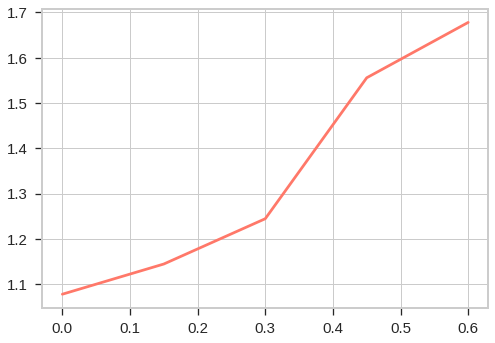

In [10]:
plt.plot(x)